## Comandos de configuração do ambiente Jupiter - IDE[VS Code]

#### Linux (Ubuntu 24.04)
**criando o ambiente virtual:**

`python3 -m venv venv`

**baixando dependências do projeto:**

`pip install -r requirements.txt`

# Importando Pacotes

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

# Acessando Base de Dados

Os dados apresentados foram retirados do site https://terrabrasilis.dpi.inpe.br/ e a base pode ser obtida através do link abaixo:

`https://terrabrasilis.dpi.inpe.br/queimadas/bdqueimadas/#exportar-dados`

**Sobre a base:**
A base contém dados referente aos primeiros 05 dias do mês setembro contendo todos os estados brasileiros. O objetivo é transformar as informações sobre focos de fogo em um dado de valor, priorizando fidelidade e clareza, permitindo assim uma análise criteriosa e tomadas de deciões mais acertivas. (Base possui 60MB aproximadamente)

</br>

#
**DADOS:**
- Data e Hora
- Satélite que registrou o foco
- País (No nosso caso todos os dados são referentes ao Brasil)
- Estado
- Município
- Bioma
- Dias sem chuva
- Precipitação
- Risco de fogo
- Latitude
- Longitude
- FRP (“Fire Radiative Power”, mede a energia radiante liberada por unidade de tempo, associada à taxa de queima da vegetação, em MW - megawatts)

In [67]:
df = pd.read_csv('./queimadas_dataset.csv')
df

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2024/09/02 01:05:00,TERRA_M-M,Brasil,PARÁ,OURILÂNDIA DO NORTE,Amazônia,19.0,0.0,0.98,-6.92824,-50.93686,8.7
1,2024/09/02 01:05:00,TERRA_M-M,Brasil,PARÁ,OURILÂNDIA DO NORTE,Amazônia,19.0,0.0,1.00,-7.62033,-51.84446,13.3
2,2024/09/02 01:05:00,TERRA_M-M,Brasil,PARÁ,CONCEIÇÃO DO ARAGUAIA,Amazônia,19.0,0.0,1.00,-8.22340,-49.37693,5.7
3,2024/09/02 01:05:00,TERRA_M-M,Brasil,AMAZONAS,APUÍ,Amazônia,11.0,0.0,1.00,-7.19130,-59.35852,69.2
4,2024/09/02 01:00:00,TERRA_M-M,Brasil,MINAS GERAIS,IAPU,Mata Atlântica,100.0,0.0,1.00,-19.44748,-42.16803,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
567966,2024/09/03 18:06:06,GOES-16,Brasil,TOCANTINS,LAGOA DA CONFUSÃO,Cerrado,NaN,NaN,NaN,-10.65890,-50.09260,149.2
567967,2024/09/03 18:05:47,GOES-16,Brasil,MARANHÃO,LORETO,Cerrado,NaN,NaN,NaN,-7.36830,-45.08880,108.9
567968,2024/09/03 18:06:00,GOES-16,Brasil,TOCANTINS,RIO SONO,Cerrado,NaN,NaN,NaN,-9.63940,-47.23970,307.7
567969,2024/09/03 18:05:55,GOES-16,Brasil,MARANHÃO,ALTO PARNAÍBA,Cerrado,NaN,NaN,NaN,-8.78830,-45.94510,70.7


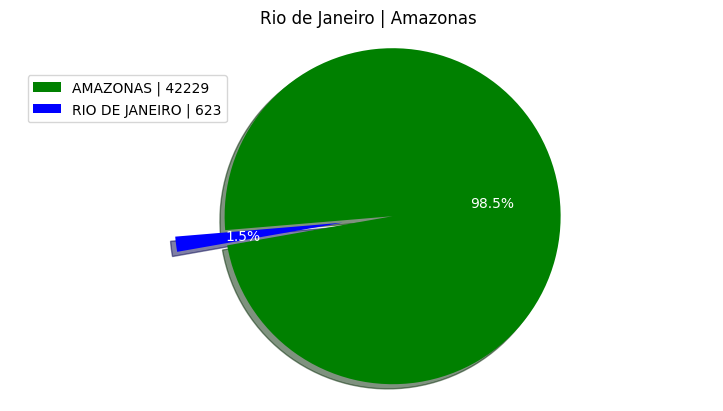

In [69]:
# Total de focos somando os dois estados
total = len(df[(df['Estado'] == 'AMAZONAS') | (df['Estado'] == 'RIO DE JANEIRO')])

# Dados AMAZONAS
total_am = len(df[df['Estado'] == 'AMAZONAS'])
#percent_am = (len(df[df['Estado'] == 'AMAZONAS']) * 100) / total

# Dados RIO DE JANEIRO
total_rj = len(df[df['Estado'] == 'RIO DE JANEIRO'])
#percent_rj = (len(df[df['Estado'] == 'RIO DE JANEIRO']) * 100) / total

# Montando Torta
data_rj_am = [total_am, total_rj]
def to_pie(estado, estados):
    total = int(np.round(estado/100.*np.sum(estados)))
    return f"{estado:.1f}%"
    #return f"{estado:.1f}%\n{total:d}"

explode = [0, 0.3]
plt.pie(
    data_rj_am, 
    labels=[f"AMAZONAS | {total_am}", f"RIO DE JANEIRO | {total_rj}"], 
    colors=['green', 'blue'], 
    autopct=lambda estado: to_pie(estado, data_rj_am), 
    startangle=190, 
    explode=explode, 
    shadow=True, 
    textprops={"color": "w"}
)
plt.title("Rio de Janeiro | Amazonas")
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(-0.2, -0.1, 0.5, 1)
)
plt.axis('equal')
plt.show()

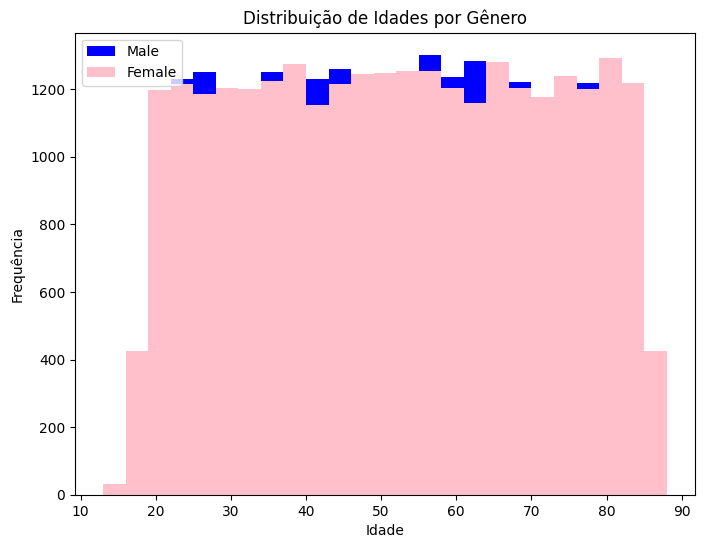

In [ ]:
# total = len(df)
# male_ages = df[df['Gender'] == 'Male']["Age"]
# female_ages = df[df['Gender'] == 'Female']["Age"]

# plt.figure(figsize=(8, 6))

# # Criar histograma para homens e mulheres
# plt.hist(male_ages, bins=np.arange(male_ages.min(), male_ages.max(), 3), alpha=1, label='Male', color='blue')
# plt.hist(female_ages, bins=np.arange(female_ages.min(), female_ages.max(), 3), alpha=1, label='Female', color='pink')

# # Adicionando título e legendas
# plt.title('Distribuição de Idades por Gênero')
# plt.xlabel('Idade')
# plt.ylabel('Frequência')
# plt.legend()

# # Mostrando o gráfico
# plt.show()

# Total de focos somando os dois estados
total = len(df[(df['Estado'] == 'AMAZONAS') | (df['Estado'] == 'RIO DE JANEIRO')])

# Dados AMAZONAS
total_am = len(df[df['Estado'] == 'AMAZONAS'])
#percent_am = (len(df[df['Estado'] == 'AMAZONAS']) * 100) / total

# Dados RIO DE JANEIRO
total_rj = len(df[df['Estado'] == 'RIO DE JANEIRO'])
#percent_rj = (len(df[df['Estado'] == 'RIO DE JANEIRO']) * 100) / total

# Montando Histograma
# plt.hist(male_ages, bins=np.arange(male_ages.min(), male_ages.max(), 3), alpha=1, label='Male', color='blue')
# plt.hist(female_ages, bins=np.arange(female_ages.min(), female_ages.max(), 3), alpha=1, label='Female', color='pink')
data_rj_am = [total_am, total_rj]
def to_pie(estado, estados):
    total = int(np.round(estado/100.*np.sum(estados)))
    return f"{estado:.1f}%"
    #return f"{estado:.1f}%\n{total:d}"

explode = [0, 0.4]
plt.pie(
    data_rj_am, 
    labels=[f"AMAZONAS | {total_am}", f"RIO DE JANEIRO | {total_rj}"], 
    colors=['green', 'blue'], 
    autopct=lambda estado: to_pie(estado, data_rj_am), 
    startangle=190, 
    explode=explode, 
    shadow=True, 
    textprops={"color": "w"}
)
plt.title("Rio de Janeiro | Amazonas")
plt.legend(
    loc='upper left', 
    bbox_to_anchor=(-0.2, -0.1, 0.5, 1)
)
plt.axis('equal')
plt.show()

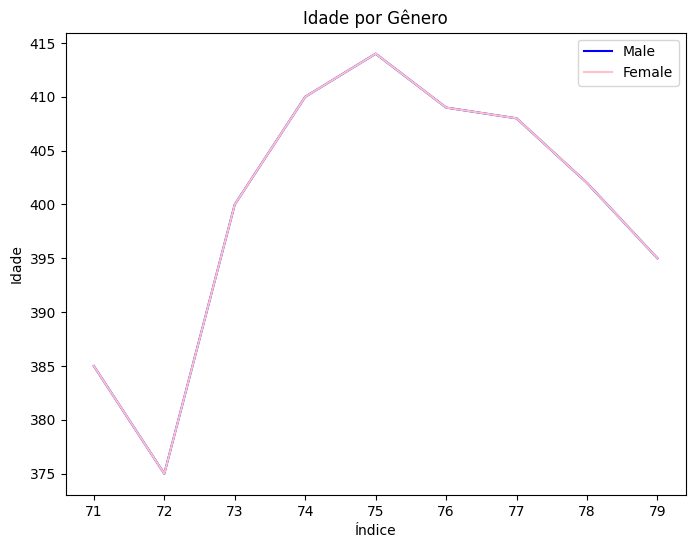

In [ ]:
# max_age = df["Age"].max()
# min_age = df["Age"].min()
# print(max_age, min_age)
# fig, ax = plt.subplots()
# bins = np.arange(min_age, max_age, 1)
# print(bins)
# ax.plot(bins, female_ages, label="Female")
# ax.plot(bins, male_ages, label="Male")

# Separando as idades por gênero
# male_ages = df[df['Gender'] == 'Male']['Age'].sort_values()
# female_ages = df[df['Gender'] == 'Female']['Age'].sort_values()
# print(male_ages)

# Criando um array para o eixo x (índices das idades)
# x_male = np.arange(1, len(male_ages) + 1)
# x_female = np.arange(1, len(female_ages) + 1)

df_male = df[(df['Gender'] == 'Male') & (df['Age'] > 70) | (df['Age'] < 40)]
df_female = df[df['Gender'] == 'Female']
age_count_male = df_male['Age'].value_counts().sort_index()
age_count_female = df_male['Age'].value_counts().sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(8, 6))

# Plotando as linhas para homens e mulheres
plt.plot(age_count_male.index, age_count_male.values, label='Male',linestyle='-', color='blue')
plt.plot(age_count_female.index, age_count_female.values, label='Female',  linestyle='-',color='pink')

# Adicionando título e legendas
plt.title('Idade por Gênero')
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.legend()

In [ ]:
df_male = 
print(df)


                   Name  Age Gender Blood Type Medical Condition  \
1          LesLie TErRy   62   Male         A+           Obesity   
10     mIchElLe daniELs   72   Male         O+            Cancer   
19       dANIEL schmIdt   63   Male         B+            Asthma   
25     PeTER fiTzgeRaLd   73   Male        AB+           Obesity   
32       WilLIAM cOOPEr   78   Male        AB-         Arthritis   
...                 ...  ...    ...        ...               ...   
55448    tIFfANy miller   78   Male         B-            Cancer   
55458  TimOTHy reynOldS   71   Male         A-      Hypertension   
55461    connOR coMPTon   63   Male         A+            Asthma   
55489    ANdrEw AGUIlaR   69   Male         O-         Arthritis   
55494     JEssIcA WHiTe   67   Male         O+         Arthritis   

      Date of Admission            Doctor                    Hospital  \
1            2019-08-20   Samantha Davies                     Kim Inc   
10           2020-04-19       John Du

In [ ]:
# Contar a quantidade de cada condição médica
condition_counts = df['Medical Condition'].value_counts()

# Calcular o percentual de cada condição
condition_percent = df['Medical Condition'].value_counts(normalize=True) * 100

# Exibir os resultados
print("Contagem por condição médica:")
print(condition_counts)

print("\nPercentual por condição médica:")
print(condition_percent)

#Plotar os resultados em um gráfico de barras
plt.figure(figsize=(10,6))
condition_percent.plot(kind='bar', color='skyblue')
plt.title('Percentual de Cada Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Percentual (%)')
plt.show()